In [36]:
import pymc3 as pm
import theano
import numpy as np
import pandas as pd
%matplotlib inline 

In [30]:
loans = pd.read_csv("/Users/maj/Downloads/Loan_Data.csv", sep = ";")
loans = pd.get_dummies(loans)
y = loans.dINC_A
x = loans.drop("dINC_A", axis = 1)
x['constant'] = 1

In [32]:
with pm.Model() as logit:
    betas = pm.Normal("betas", mu = 0, sd = 100, shape = x.shape[1])
    sigma = pm.HalfNormal("sigma", sd = 1)
    
    mu = pm.math.dot(x,betas)
    
    yhat = pm.Normal("yhat", mu = mu, sd = sigma, observed = y)
    

In [40]:
with logit:
    map_estimate = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(100, step = step)

         Current function value: 10213257.356346
         Iterations: 2
         Function evaluations: 18
         Gradient evaluations: 6


100%|██████████| 100/100 [00:20<00:00,  4.64it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd49908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113bb4208>]], dtype=object)

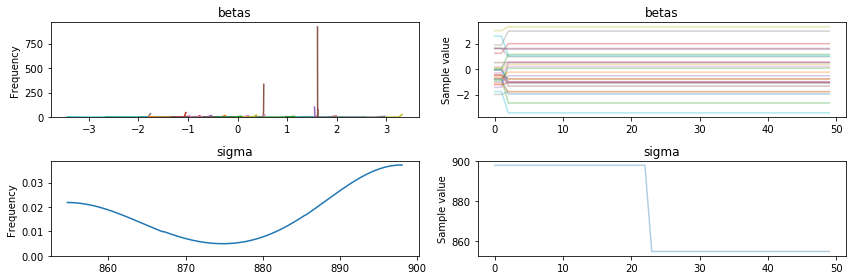

In [41]:
pm.traceplot(trace[50:])